## **Álgebra Linear** | Data Science
> Realização do trabalho para o curso de Álgebra Linar utilizando a análise de componentes principais em um conjunto de dados
##### Este conjunto de dados contém informações sobre o custo de vida em quase 5.000 cidades em todo o mundo
##### Os dados foram coletados raspando o site da Numbeo, https://www.numbeo.com


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')

### Requisitos para a Análise
Os dados devem ser padronizados, ou seja, devem ser consistente em seu padrão em relação a outra váriavel, além de que devem ser variáveis quantitativas discretas ou contínuas

* Por isso, manipularemos os dados para a melhor interpretação das colunas
* Padronizaremos os dados antes da análise,. os dados vem no formato USD e L, Kg e g.
* Utilização do dicionário dos dados

*Mas primeiro precisamos tratar os dados*

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Principal-Component-Analysis/main/data/cost-of-living.csv')
dic = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Principal-Component-Analysis/main/data/dictionary.csv')

### Tratamento e Manipulação | Criação da Amostra
* Resolvi deixar os nomes completos, ao invez de tentar encurtalos pois poderia haver alguma confusão com a identificação
* Exclusão das linhas com a qualidade dos dados igual a Zero, pois são necessários mais contribuidores para aumentar a qualidade dos dados

In [3]:
# Seleção de linhas onde a qualidade dos dados são boas
df = df.loc[df['data_quality'] == 1, :]

# Remover uma coluna a mais contendo o index, e a qualidade dos dados
if len(df.columns) == 59:
    df = df.iloc[:, 1:58].reset_index(drop=True)
    
# Renomeação das colunas
df.columns = ['Nome da cidade', 'Nome do país', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'McMeal no McDonalds (ou Combo Refeição Equivalente)', 'Cerveja Nacional (0,5 litro de chope, em restaurantes)', 'Cerveja Importada (garrafa de 0,33 litro, em restaurantes)', 'Cappuccino (normal, em restaurantes)', 'Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)', 'Água (garrafa de 0,33 litros, em restaurantes)', 'Leite (comum), (1 litro)', 'Pão Branco Fresco (500g)', 'Arroz (branco), (1kg)', 'Ovos (comuns) (12)', 'Queijo Nacional (1kg)', 'Filetes de Frango (1kg)', 'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)', 'Maçãs (1kg)', 'Banana (1kg)', 'Laranjas (1kg)', 'Tomate (1kg)', 'Batata (1kg)', 'Cebola (1kg)', 'Alface (1 cabeça)', 'Água (garrafa de 1,5 litro, no mercado)', 'Garrafa de Vinho (Média, no mercado)', 'Cerveja Nacional (garrafa de 0,5 litro, no mercado)', 'Cerveja Importada (garrafa de 0,33 litro, no mercado)', 'Pacote de 20 cigarros (Marlboro)', 'Bilhete de ida (transporte local)', 'Passe mensal (preço normal)', 'Taxi Start (tarifa normal)', 'Táxi 1km (Tarifa Normal)', 'Táxi 1 hora de espera (tarifa normal)', 'Gasolina (1 litro)', 'Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente)', 'Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente)', 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2', '1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Fitness Club, mensalidade para 1 adulto', 'Aluguel de quadra de tênis (1 hora no fim de semana)', 'Cinema, Lançamento Internacional, 1 Lugar', 'Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança', 'Escola primária internacional, anual para 1 criança', '1 par de jeans (Levis 501 ou similar)', '1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)', '1 par de tênis de corrida Nike (gama média)', '1 par de sapatos masculinos de negócios em couro', 'Apartamento (1 quarto) no centro da cidade', 'Apartamento (1 quarto) Fora do Centro', 'Apartamento (3 quartos) no centro da cidade', 'Apartamento (3 quartos) Fora do Centro', 'Preço por metro quadrado para comprar apartamento no centro da cidade', 'Preço por metro quadrado para comprar apartamento fora do centro', 'Salário Líquido Médio Mensal (Após Impostos)', 'Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa']

In [4]:
# Organização das colunas
df = df[['Nome da cidade', 'Nome do país',
 'Salário Líquido Médio Mensal (Após Impostos)',
 'Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa',
 
 # Bens materiais
 '1 par de jeans (Levis 501 ou similar)',
 '1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)',
 '1 par de tênis de corrida Nike (gama média)',
 '1 par de sapatos masculinos de negócios em couro',
 'Preço por metro quadrado para comprar apartamento no centro da cidade',
 'Preço por metro quadrado para comprar apartamento fora do centro',
 'Apartamento (1 quarto) no centro da cidade',
 'Apartamento (1 quarto) Fora do Centro',
 'Apartamento (3 quartos) no centro da cidade',
 'Apartamento (3 quartos) Fora do Centro',
 'Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente)',
 'Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente)',
 
 # Necessidades
 
 'Leite (comum), (1 litro)',
 'Água (garrafa de 0,33 litros, em restaurantes)',
 'Água (garrafa de 1,5 litro, no mercado)',
 'Arroz (branco), (1kg)',
 'Queijo Nacional (1kg)',
 'Filetes de Frango (1kg)',
 'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)',
 'Maçãs (1kg)',
 'Banana (1kg)',
 'Laranjas (1kg)',
 'Tomate (1kg)',
 'Batata (1kg)',
 'Cebola (1kg)',
 'Pão Branco Fresco (500g)',
 'Alface (1 cabeça)',
 'Ovos (comuns) (12)',

 # Planos e Serviços
 'Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança',
 'Escola primária internacional, anual para 1 criança',
 'Gasolina (1 litro)',
 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)',
 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2',
 '1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos)',
 'Bilhete de ida (transporte local)',
 'Passe mensal (preço normal)',
 'Taxi Start (tarifa normal)',
 'Táxi 1km (Tarifa Normal)',
 'Táxi 1 hora de espera (tarifa normal)',
 'Fitness Club, mensalidade para 1 adulto',
 
 # Lazer e Outros
 'Cinema, Lançamento Internacional, 1 Lugar',
 'Refeição, restaurante barato',
 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos',
 'Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)',
 'Cappuccino (normal, em restaurantes)',
 'McMeal no McDonalds (ou Combo Refeição Equivalente)',
 'Aluguel de quadra de tênis (1 hora no fim de semana)',
 'Garrafa de Vinho (Média, no mercado)',
 'Cerveja Nacional (0,5 litro de chope, em restaurantes)',
 'Cerveja Importada (garrafa de 0,33 litro, em restaurantes)',
 'Cerveja Nacional (garrafa de 0,5 litro, no mercado)',
 'Cerveja Importada (garrafa de 0,33 litro, no mercado)',
 'Pacote de 20 cigarros (Marlboro)']]

In [5]:
display(df.head(10))

,Nome da cidade,Nome do país,Salário Líquido Médio Mensal (Após Impostos),"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",1 par de jeans (Levis 501 ou similar),"1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)",1 par de tênis de corrida Nike (gama média),1 par de sapatos masculinos de negócios em couro,Preço por metro quadrado para comprar apartamento no centro da cidade,Preço por metro quadrado para comprar apartamento fora do centro,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente),Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente),"Leite (comum), (1 litro)","Água (garrafa de 0,33 litros, em restaurantes)","Água (garrafa de 1,5 litro, no mercado)","Arroz (branco), (1kg)",Queijo Nacional (1kg),Filetes de Frango (1kg),Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira),Maçãs (1kg),Banana (1kg),Laranjas (1kg),Tomate (1kg),Batata (1kg),Cebola (1kg),Pão Branco Fresco (500g),Alface (1 cabeça),Ovos (comuns) (12),"Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança","Escola primária internacional, anual para 1 criança",Gasolina (1 litro),"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)","Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2",1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos),Bilhete de ida (transporte local),Passe mensal (preço normal),Taxi Start (tarifa normal),Táxi 1km (Tarifa Normal),Táxi 1 hora de espera (tarifa normal),"Fitness Club, mensalidade para 1 adulto","Cinema, Lançamento Internacional, 1 Lugar","Refeição, restaurante barato","Refeição para 2 Pessoas, Restaurante Médio, Três Pratos","Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)","Cappuccino (normal, em restaurantes)",McMeal no McDonalds (ou Combo Refeição Equivalente),Aluguel de quadra de tênis (1 hora no fim de semana),"Garrafa de Vinho (Média, no mercado)","Cerveja Nacional (0,5 litro de chope, em restaurantes)","Cerveja Importada (garrafa de 0,33 litro, em restaurantes)","Cerveja Nacional (garrafa de 0,5 litro, no mercado)","Cerveja Importada (garrafa de 0,33 litro, no mercado)",Pacote de 20 cigarros (Marlboro)
0,Delhi,India,586.35,7.96,32.05,33.34,49.35,36.26,2619.46,1068.90,223.87,133.38,596.16,325.82,12242.64,22972.31,0.73,0.19,0.36,0.88,4.32,3.79,5.57,1.80,0.75,1.01,0.60,0.36,0.41,0.51,0.70,1.01,73.76,1985.70,1.25,7.96,57.37,0.01,0.49,11.63,0.61,0.22,1.22,21.07,4.90,4.90,22.04,0.48,1.78,4.28,8.47,9.79,1.84,3.67,1.53,2.51,4.28
1,Shanghai,China,1382.83,5.01,69.17,34.26,86.55,121.19,17333.09,9174.88,1080.07,564.30,2972.57,1532.23,19554.98,20360.82,2.68,0.32,0.62,1.18,18.01,4.67,12.79,2.22,1.55,2.11,1.47,0.82,1.02,2.57,0.82,2.17,1356.63,25883.49,1.17,16.74,64.76,0.03,0.56,27.94,2.10,0.42,8.38,63.23,8.38,5.59,40.51,0.52,3.96,5.59,14.67,13.97,1.12,4.19,0.91,1.93,3.49
2,Jakarta,Indonesia,483.19,9.15,38.87,25.95,72.89,80.32,2694.05,1269.44,482.85,270.15,1117.69,584.37,25489.74,27978.73,1.28,0.27,0.42,0.83,6.66,3.46,8.32,2.80,1.52,2.08,1.24,1.35,2.10,1.21,1.13,1.70,132.74,9934.37,0.79,30.45,80.12,0.11,0.22,9.53,0.41,0.29,2.86,30.86,3.18,2.54,22.25,0.59,2.19,3.50,11.71,20.66,2.02,3.18,2.06,3.18,2.22
3,Manila,Philippines,419.02,7.80,38.45,26.96,69.47,61.82,3536.04,2596.44,559.52,281.78,1754.40,684.81,22984.03,18200.60,1.63,0.51,0.65,0.89,5.06,4.19,6.64,2.66,1.42,2.95,1.42,1.76,1.75,1.19,1.36,1.73,254.89,10860.59,1.38,38.02,97.45,0.15,0.53,11.86,0.71,0.24,2.12,48.09,5.48,3.54,27.40,0.93,2.91,3.54,5.85,8.84,1.24,1.90,1.15,1.55,2.65
4,Seoul,South Korea,2672.23,3.47,56.99,45.49,70.21,108.30,21847.94,10832.90,809.83,583.60,2621.05,1683.74,28648.67,26851.06,2.13,0.78,1.06,3.66,11.13,10.62,40.41,6.79,3.70,6.40,6.36,3.86,2.81,2.78,2.40,4.02,384.01,18283.99,1.41,22.06,176.24,0.16,0.98,41.47,2.86,0.90,9.05,54.84,9.42,7.16,52.77,

## Pequena análise da Correlação
* Uma visualização das correlações dos alimentos

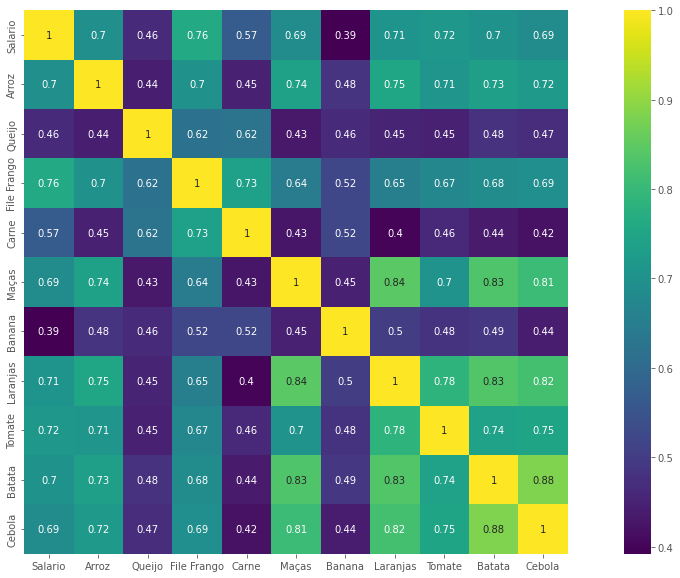

In [6]:
# Criação da Matriz de Correlação, da pequena parcela dos dados para uma pequena análise
cols = ['Salario', 'Arroz', 'Queijo', 'File Frango', 'Carne', 'Maças', 'Banana', 'Laranjas', 'Tomate', 'Batata', 'Cebola']
cr = df[['Salário Líquido Médio Mensal (Após Impostos)', 'Arroz (branco), (1kg)', 'Queijo Nacional (1kg)', 'Filetes de Frango (1kg)',
         'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)', 'Maçãs (1kg)', 'Banana (1kg)', 'Laranjas (1kg)',
         'Tomate (1kg)', 'Batata (1kg)', 'Cebola (1kg)']].corr()
plt.figure(figsize=(20,10))
sns.heatmap(cr, xticklabels=cols, yticklabels=cols, vmax=1, square=True,annot=True,cmap='viridis');

### Principal Component Analysis | Moradia
* Decomposição da Matriz de Covariância
* Outras análises com a Matriz

In [7]:
# Convertendo os dados da moradia em uma Matriz
mtz = np.matrix(df.iloc[:, 10:14])

# Covariancia
cv = np.cov(np.transpose(mtz))

In [8]:
# Visualização da diagonal principal da matriz de covariancia
np.diagonal(cv)

array([ 369952.15720707,  234232.86442369, 1078283.98756868,
        601890.81045384])

In [9]:
# Definindo 4 componentes principais
pca = PCA(n_components=4)
pca.fit(mtz)

PCA(n_components=4)

In [10]:
# Aqui são os Coefcientes de uma combinação linear das variaveis, que originam a componente principal
pca.components_

array([[ 0.39226733,  0.30791793,  0.69573559,  0.51697667],
       [ 0.60974825,  0.56592022, -0.55200455, -0.05685381],
       [ 0.39784864, -0.09939191,  0.42090457, -0.80912116],
       [ 0.56218313, -0.7583153 , -0.18461395,  0.2735429 ]])

In [11]:
# Explicação dos componentes em 90% da variabilidade dos dados
pca.explained_variance_ratio_
# Logo, a primeira componente explica 95% da variabilidade

array([0.94738385, 0.03500285, 0.0152623 , 0.002351  ])

In [12]:
# Visualização das componentes acumuladas
pca.explained_variance_ratio_.cumsum()
# Logo, ao utilizar 2 componentes principais, teremos uma explicação melhor

array([0.94738385, 0.98238669, 0.997649  , 1.        ])

### Análise com 2 componentes

In [13]:
# Criação da variavel Home
hm = df.iloc[:, 10:14]
hm.head(3)

,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro
0,223.87,133.38,596.16,325.82
1,1080.07,564.30,2972.57,1532.23
2,482.85,270.15,1117.69,584.37


In [14]:
# Redefinindo para 2 componentes principais
pca = PCA(n_components=2)
pca.fit(mtz)

# Pesos das componentes principais
pca.components_

array([[ 0.39226733,  0.30791793,  0.69573559,  0.51697667],
       [ 0.60974825,  0.56592022, -0.55200455, -0.05685381]])

In [15]:
pca1 = pca.transform(mtz)[:,0]
pca2 = pca.transform(mtz)[:,1]

# Esses coeficientes nas variaveis, indicam a direção do crescimento delas
hm['PCA_One'] = pca1
hm['PCA_Two'] = pca2


#### Componentes
* Vemos que pelos um ou outro componente principal, o maior deles está em 3º posição, ou seja, em Apartamento (3 quartos) no centro da cidade, quanto menor o componente, melhor será o preço para quem está pagando

In [16]:
# Pelo primeiro componente, temos que o Apartamento (3 quartos) no centro da cidade tem o maior peso
display(pca.components_[0])
display(hm.head(3))

array([0.39226733, 0.30791793, 0.69573559, 0.51697667])

,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
0,223.87,133.38,596.16,325.82,-1362.349555,-112.623160
1,1080.07,564.30,2972.57,1532.23,1383.236568,-727.068495
2,482.85,270.15,1117.69,584.37,-722.134926,-179.896133


In [17]:
# Ordenando pela primeira componente principal
hm.sort_values('PCA_One')

,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
149,51.98,53.46,103.58,72.40,-1928.102853,23.653161
179,69.80,43.81,148.51,80.19,-1888.797409,3.813289
835,77.79,53.65,134.12,107.30,-1878.629678,20.655871
159,53.74,45.19,181.39,131.43,-1845.306625,-26.261397
443,53.84,53.84,187.27,121.72,-1843.532826,-23.998948
...,...,...,...,...,...,...
707,2950.00,2500.00,4666.67,3666.67,4994.887102,452.067881
69,2660.73,1965.72,5317.61,3466.53,5066.315955,-374.616971
765,2247.50,1866.67,5166.67,4083.33,5087.576933,-634.385498
314,3250.00,2050.00,6666.67,4325.00,6705.816667,-761.109407


In [18]:
# Ordenando pela segunda componente principal, no qual o Apartamento (1 quarto) no centro da cidade tem o maior peso
display(pca.components_[1])
hm.sort_values('PCA_Two', ascending=False) # Ornenando por decrescente

array([ 0.60974825,  0.56592022, -0.55200455, -0.05685381])

,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
214,6678.34,4996.74,1230.51,921.46,3416.315767,6191.223901
830,3002.94,1341.31,2762.71,2102.06,2525.352709,968.570460
854,2700.00,2250.00,3633.33,3500.00,4014.744869,738.034966
548,2575.77,2390.62,4057.27,3475.62,4291.659172,509.234931
781,1775.00,1666.67,2566.67,2466.67,2195.958994,491.449507
...,...,...,...,...,...,...
314,3250.00,2050.00,6666.67,4325.00,6705.816667,-761.109407
384,583.44,342.55,2437.32,1413.04,686.133118,-853.143737
34,818.64,427.13,3093.89,3248.59,2210.173735,-1128.653046
213,2275.44,1070.13,5932.67,2562.69,4600.065998,-1404.508540


### Concluindo
* Se caso eu queira buscar pela apartamento (seja qual for ele) com o menor preço, com base no custo de vida, eu buscaria pelos componentes


In [19]:
price = df[['Nome da cidade','Nome do país', 'Apartamento (1 quarto) Fora do Centro', 'Apartamento (1 quarto) no centro da cidade', 'Apartamento (3 quartos) no centro da cidade', 'Apartamento (3 quartos) Fora do Centro']]
price['PCA_One'] = pca1
price['PCA_Two'] = pca2

### Conclusão da Análise
#### Logo, temos uma visão multivariavda dos preços dos apartamentos, no qual estão inter-relacionadas, obteno assim um aproveitamento maior em comparação a uma análise de dados simples, ou utilizando a ordenação pelo menor preço

In [20]:
price.sort_values('PCA_One', ascending=1).head(30)

,Nome da cidade,Nome do país,Apartamento (1 quarto) Fora do Centro,Apartamento (1 quarto) no centro da cidade,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
149,Peshawar,Pakistan,53.46,51.98,103.58,72.40,-1928.102853,23.653161
179,Hyderabad City,Pakistan,43.81,69.80,148.51,80.19,-1888.797409,3.813289
835,Trabzon,Turkey,53.65,77.79,134.12,107.30,-1878.629678,20.655871
159,Multan,Pakistan,45.19,53.74,181.39,131.43,-1845.306625,-26.261397
443,Sylhet,Bangladesh,53.84,53.84,187.27,121.72,-1843.532826,-23.998948
92,Faisalabad,Pakistan,50.79,83.16,173.75,133.23,-1836.426641,-1.038472
429,Jammu,India,91.82,138.75,146.91,106.10,-1834.685748,72.435385
163,Bhopal,India,45.30,68.35,208.12,116.31,-1828.761403,-31.186176
654,Aydin,Turkey,81.81,135.46,166.31,104.61,-1826.331591,54.140276
834,Denizli,Turkey,78.68,96.57,195.81,100.14,-1824.337336,12.625839


In [21]:
# Mais caro pelo componente 2
price.sort_values('PCA_Two', ascending=0).head(30)

,Nome da cidade,Nome do país,Apartamento (1 quarto) Fora do Centro,Apartamento (1 quarto) no centro da cidade,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
214,Sharjah,United Arab Emirates,4996.74,6678.34,1230.51,921.46,3416.315767,6191.223901
830,Walton upon Thames,United Kingdom,1341.31,3002.94,2762.71,2102.06,2525.352709,968.570460
854,Aventura,United States,2250.00,2700.00,3633.33,3500.00,4014.744869,738.034966
548,Irvine,United States,2390.62,2575.77,4057.27,3475.62,4291.659172,509.234931
781,Everett,United States,1666.67,1775.00,2566.67,2466.67,2195.958994,491.449507
641,Olympia,United States,1391.25,1524.17,2096.25,1959.00,1423.018341,471.177557
448,Port St. Lucie,United States,1516.67,1800.00,2525.00,2300.00,2044.422185,454.283033
785,Bend,United States,1850.00,2300.00,3375.00,2760.00,3172.378654,452.438729
707,Sunnyvale,United States,2500.00,2950.00,4666.67,3666.67,4994.887102,452.067881
397,Brampton,Canada,1140.52,1431.98,1845.48,1669.52,985.526933,427.955909


In [22]:
# Mais caro pelo componente 1
price.sort_values('PCA_One', ascending=0).head(30)
# Os estados unidos possuem apartamentos mais caros conforme o custo de vida

,Nome da cidade,Nome do país,Apartamento (1 quarto) Fora do Centro,Apartamento (1 quarto) no centro da cidade,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
20,New York,United States,2337.00,3851.51,7146.84,4365.28,7385.037015,-499.266729
314,Hamilton,Bermuda,2050.00,3250.00,6666.67,4325.00,6705.816667,-761.109407
765,Berkeley,United States,1866.67,2247.50,5166.67,4083.33,5087.576933,-634.385498
69,Singapore,Singapore,1965.72,2660.73,5317.61,3466.53,5066.315955,-374.616971
707,Sunnyvale,United States,2500.00,2950.00,4666.67,3666.67,4994.887102,452.067881
461,Oakland,United States,2020.00,2400.00,4866.67,3800.00,4839.415080,-272.916590
76,Boston,United States,1959.38,2691.67,5017.15,3357.41,4811.047297,-187.280121
32,Los Angeles,United States,1952.66,2568.47,4668.57,3599.83,4643.456725,-87.568843
717,Bellevue,United States,2300.00,2500.00,4466.67,3650.00,4609.018097,175.845788
213,Abuja,Nigeria,1070.13,2275.44,5932.67,2562.69,4600.065998,-1404.508540


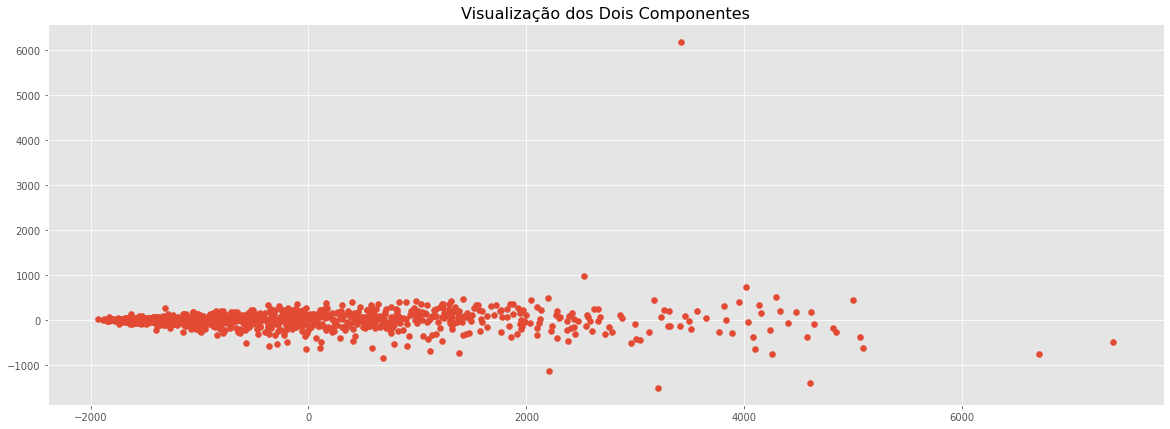

In [23]:
fig = plt.figure(figsize=(20,7))
plt.scatter(price['PCA_One'], price['PCA_Two'])
plt.title('Visualização dos Dois Componentes', fontdict={'fontsize': 16});
